In [2]:
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

In [3]:
# 한글
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

AttributeError: images

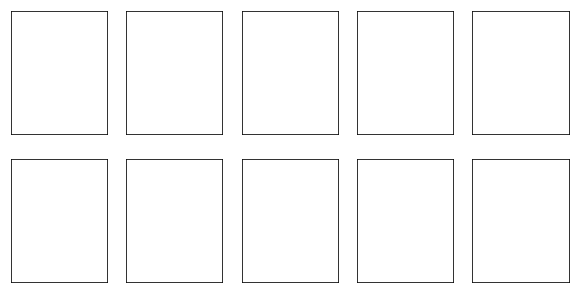

In [4]:
digits = load_iris()

# fig, axes = plt.subplots(2,5, figsize=(10,5),
#         subplot_kw = {'xticks':(), 'yticks':()})
# for ax, img in zip(axes.ravel(), digits.images):
#         ax.imshow(img)

In [6]:
print(digits.data.shape) # 1797행, 64열(8*8) - 1797개 8x8 픽셀정보
print(digits.data[1:5])
print(digits.DESCR)
# print(digits.images[1:5])
# print(digits.images.shape)
# print(digits.target[1:15])
# print(digits.target.shape)
# print(digits.target_names)

(150, 4)
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    =============

Text(0,0.5,'두 번째 주성분')

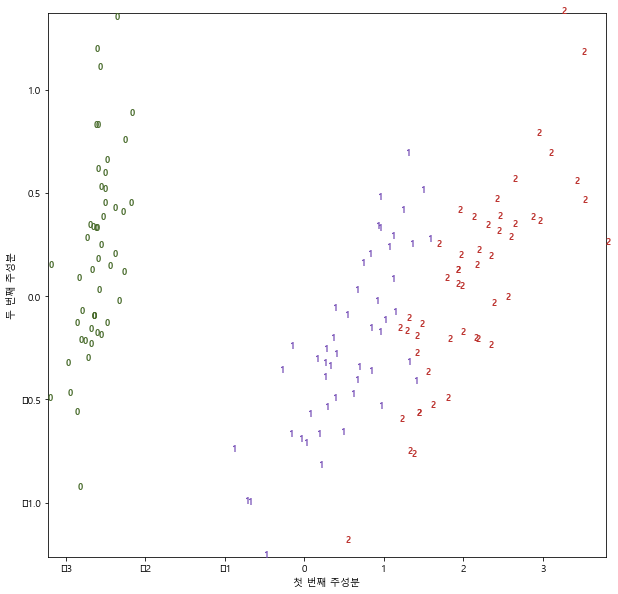

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
# colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
#  "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # 숫자 텍스트를 이용해 산점도를 그립니다
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [9]:
from sklearn.manifold import TSNE
tsne =TSNE(random_state=12)
d_tsne = tsne.fit_transform(digits.data)

In [10]:
print(digits.data.shape)
print(d_tsne.shape)

(150, 4)
(150, 2)


In [11]:
print(d_tsne[:,0].shape)

(150,)


In [12]:
d_tsne.shape

(150, 2)

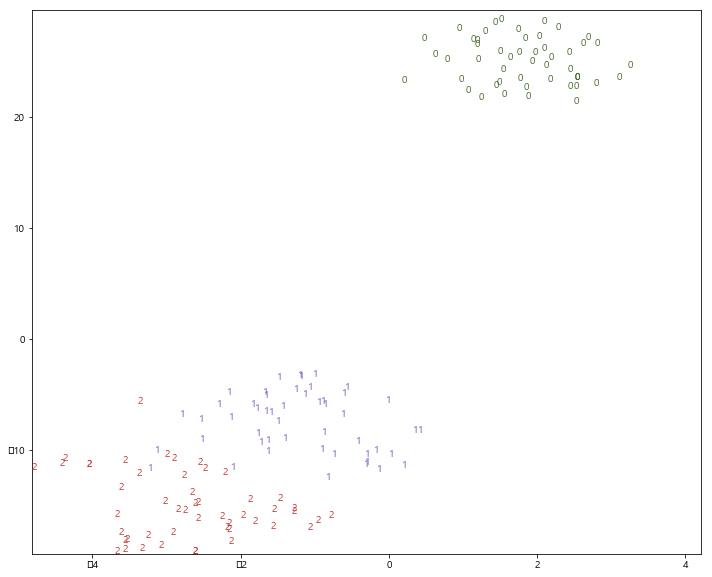

In [13]:
plt.figure(figsize=(12,10))
plt.xlim(d_tsne[:,0].min(),d_tsne[:,0].max()+1)#x축 법위 설정 
plt.ylim(d_tsne[:,1].min(),d_tsne[:,1].max()+1)# y 축 범위 설정 

for i in range(len(digits.data)):
    plt.text(d_tsne[i,0],
             d_tsne[i,1],
             str(digits.target[i]),
             color =colors[digits.target[i]],
             )
